# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities info
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Make a Dataframe for city/country data
city_loc = pd.DataFrame({"City": cities, "Country": countries})
city_loc = city_loc.reset_index(drop=True)
city_loc.head()

# add columns to store the rest of the desired data
city_loc["Cloudiness"] = ""
city_loc["Humidity"] = ""
city_loc["Date"] = ""
city_loc["Max Temp"] = ""
city_loc["Wind Speed"] = ""

# Print the city count to confirm sufficient count
len(cities)

622

In [5]:
# Make a Dataframe for coordinates
city_coord = pd.DataFrame()
city_coord = city_coord.append(pd.DataFrame.from_dict({ "Latitude": lats, "Longitude": lngs}))   
city_coord

# Merge city dataframe and coordinates dataframe
data_merge = [city_loc, city_coord]
city_data = pd.concat([city_loc, city_coord], axis=1)
city_data = city_data.drop_duplicates()
city_data = city_data.dropna()
city_data = city_data.reset_index(drop=True)
city_data = pd.DataFrame(city_data)
city_data.head(10)

,City,Country,Cloudiness,Humidity,Date,Max Temp,Wind Speed,Latitude,Longitude
0,broome,au,,,,,,-18.199853,124.639856
1,maarianhamina,fi,,,,,,59.301335,20.298746
2,nisia floresta,br,,,,,,-5.124556,-32.044612
3,togur,ru,,,,,,58.202172,82.434135
4,atar,mr,,,,,,24.563160,-10.294991
5,jamestown,sh,,,,,,-9.328654,-0.366027
6,oranjemund,na,,,,,,-28.768519,15.512658
7,guangyuan,cn,,,,,,33.130039,105.330418
8,mataura,pf,,,,,,-49.612412,-160.231687
9,puri,in,,,,,,18.632721,86.239268


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# pulling website with API key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Make request and store response
response = requests.get(f"{url}&q={city}").json()
response

{'coord': {'lon': 80.19, 'lat': 51.36},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 47.52,
  'feels_like': 38.66,
  'temp_min': 47.52,
  'temp_max': 47.52,
  'pressure': 1021,
  'humidity': 55,
  'sea_level': 1021,
  'grnd_level': 997},
 'wind': {'speed': 9.42, 'deg': 230},
 'clouds': {'all': 18},
 'dt': 1588284467,
 'sys': {'country': 'RU', 'sunrise': 1588288269, 'sunset': 1588341678},
 'timezone': 25200,
 'id': 1488632,
 'name': 'Uglovskoye',
 'cod': 200}

In [7]:
# create lists for data columns and a counter number of calls
city_names = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
record = 0

# Loop through the list of cities and perform a request for data on each
print(f"Beginning Data Retrieval")
for city in cities:
    try:
        response = requests.get(f"{url}&q={city}").json()
        city_names.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        city_record = (response['name'])
        record += 1
        print(f"The weather API responded with:# {record} : {city_record}")
        time.sleep(1)
    
    except KeyError: 
        print("City Skipped: Data Missing")
        
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval
The weather API responded with:# 1 : Broome
The weather API responded with:# 2 : Mariehamn
The weather API responded with:# 3 : Nísia Floresta
The weather API responded with:# 4 : Togur
The weather API responded with:# 5 : Atar
The weather API responded with:# 6 : Jamestown
The weather API responded with:# 7 : Oranjemund
The weather API responded with:# 8 : Guangyuan
The weather API responded with:# 9 : Mataura
The weather API responded with:# 10 : Puri
The weather API responded with:# 11 : Kaitangata
The weather API responded with:# 12 : Busselton
The weather API responded with:# 13 : Yumen
The weather API responded with:# 14 : Mayor Pablo Lagerenza
City Skipped: Data Missing
The weather API responded with:# 15 : Cabo San Lucas
City Skipped: Data Missing
The weather API responded with:# 16 : San Cristobal
City Skipped: Data Missing
The weather API responded with:# 17 : Areosa
City Skipped: Data Missing
The weather API responded with:# 18 : Butaritari
The weath

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Create Dictionary of data with column names
city_weather = {"City": cities, "Country": country,
               "Cloudiness %": cloudiness, "Humidity": humidity,
               "Date": date, "Max Temp (F)": max_temp,
               "Wind Speed (mph)": wind_speed, "Latitude": lat,
               "Longitude": lng}

weather_data = pd.DataFrame.from_dict(city_weather, orient='index')

# Switch row and columns titles
weather_data = weather_data.transpose()

# Dropping records with no data
weather_data.dropna(inplace=True)
weather_data

,City,Country,Cloudiness %,Humidity,Date,Max Temp (F),Wind Speed (mph),Latitude,Longitude
0,broome,US,90,93,1588284467,59,20.8,42.25,-75.83
1,maarianhamina,AX,68,75,1588284186,39.2,9.17,60.1,19.93
2,nisia floresta,BR,40,78,1588284469,80.6,5.82,-6.09,-35.21
3,togur,RU,86,83,1588284470,44.4,9.75,58.36,82.83
4,atar,MR,0,16,1588284471,85.69,12.84,20.52,-13.05
...,...,...,...,...,...,...,...,...,...
576,bichena,PH,100,78,1588285178,78.55,7.43,10.67,122.95
577,ghanzi,TZ,75,94,1588285179,77,6.04,-6.8,39.25
578,vestmannaeyjar,IN,96,69,1588285180,67.15,3.67,27.92,96.17
579,ancud,BR,20,100,1588285181,77,4.7,-6.98,-34.83


In [10]:
# Exporting city data to csv file
weather_data.to_csv("./output/my_weather_data.csv")

# Making a Dataframe to display csv file
display_df = pd.read_csv("./output/my_weather_data.csv")
display_df.head()

,Unnamed: 0,City,Country,Cloudiness %,Humidity,Date,Max Temp (F),Wind Speed (mph),Latitude,Longitude
0,0,broome,US,90,93,1588284467,59.00,20.80,42.25,-75.83
1,1,maarianhamina,AX,68,75,1588284186,39.20,9.17,60.10,19.93
2,2,nisia floresta,BR,40,78,1588284469,80.60,5.82,-6.09,-35.21
3,3,togur,RU,86,83,1588284470,44.40,9.75,58.36,82.83
4,4,atar,MR,0,16,1588284471,85.69,12.84,20.52,-13.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [11]:
from datetime import datetime
date_stamp = datetime.date(datetime.now())
print(date_stamp)

2020-04-30


#### Latitude vs. Temperature Plot

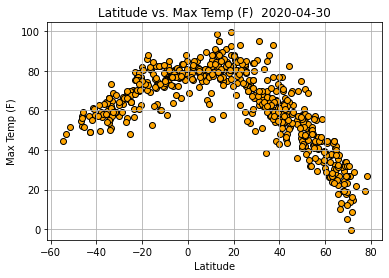

In [15]:
# Assigning values of each axis
x_values = weather_data['Latitude']
y_values = weather_data['Max Temp (F)']

# Creating scatter plot
plt.scatter(x_values, y_values, c="orange", edgecolors="black")

plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title(f"Latitude vs. Max Temp (F)  {date_stamp}")
plt.grid()
plt.savefig("./output/Images/Latitude_vs_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

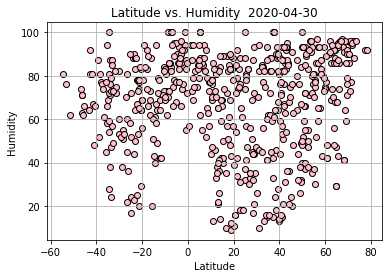

In [16]:
# Assigning values of each axis
x_values = weather_data['Latitude']
y_values = weather_data['Humidity']

# Creating scatter plot
plt.scatter(x_values, y_values, c="pink", edgecolors="black")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f"Latitude vs. Humidity  {date_stamp}")
plt.grid()
plt.savefig("./output/Images/Latitude_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

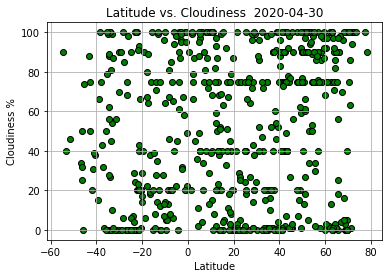

In [17]:
# Assigning values of each axis
x_values = weather_data['Latitude']
y_values = weather_data['Cloudiness %']

# Creating scatter plot
plt.scatter(x_values, y_values, c="green", edgecolors="black")

plt.xlabel('Latitude')
plt.ylabel("Cloudiness %")
plt.title(f"Latitude vs. Cloudiness  {date_stamp}")
plt.grid()
plt.savefig("./output/Images/Latitude_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

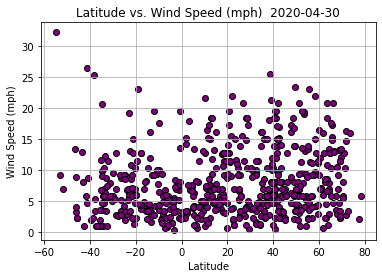

In [18]:
# Assigning values of each axis
x_values = weather_data['Latitude']
y_values = weather_data['Wind Speed (mph)']

# Creating scatter plot
plt.scatter(x_values, y_values, c="purple", edgecolors="black")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"Latitude vs. Wind Speed (mph)  {date_stamp}")
plt.grid()
plt.savefig("./output/Images/Latitude_vs_Wind.png")
plt.show()

## Linear Regression

In [19]:
# OPTIONAL: Create a function to create Linear Regression plots


In [20]:
# Create Northern and Southern Hemisphere DataFrames 
# Using the equator to separate cities into hemispheres
north_hem = weather_data[weather_data["Latitude"]>= 0]
south_hem = weather_data[weather_data["Latitude"]< 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7815290430645409


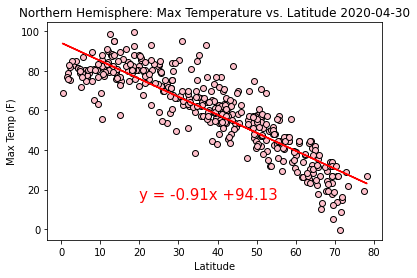

In [27]:
from matplotlib import pyplot as plt
from scipy.stats import linregress

# Creating a plot for max temp vs latitude
x_values = north_hem['Latitude'].astype(float)
y_values = north_hem['Max Temp (F)'].astype(float)

# Performing linear regression on max temp vs. latitude values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Creating scatter plot
plt.scatter(x_values,y_values, c="pink", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title(f"Northern Hemisphere: Max Temperature vs. Latitude {date_stamp}")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
     
plt.savefig("./output/Images/NH_Temp_vs_Latitude.png")
 
# Print r square value
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.61429019509682


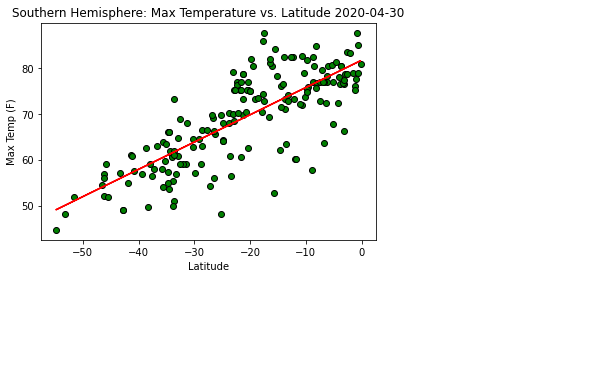

In [28]:
# Creating a plot for max temp vs latitude
x_values = south_hem['Latitude'].astype(float)
y_values = south_hem['Max Temp (F)'].astype(float)

# Performing linear regression on max temp vs. latitude values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Creating scatter plot
plt.scatter(x_values,y_values, c="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title(f"Southern Hemisphere: Max Temperature vs. Latitude {date_stamp}")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
     
plt.savefig("./output/Images/SH_Temp_vs_Latitude.png")
 
# Print r square value
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.02513809906271743


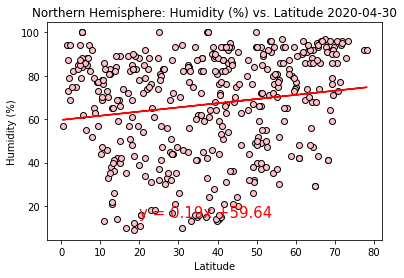

In [32]:
# Creating a plot for max temp vs latitude
x_values = north_hem['Latitude'].astype(float)
y_values = north_hem['Humidity'].astype(float)

# Performing linear regression on max temp vs. latitude values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Creating scatter plot
plt.scatter(x_values,y_values, c="pink", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"Northern Hemisphere: Humidity (%) vs. Latitude {date_stamp}")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
     
plt.savefig("./output/Images/NH_Humidity_vs_Latitude.png")
 
# Print r square value
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0689615763599674


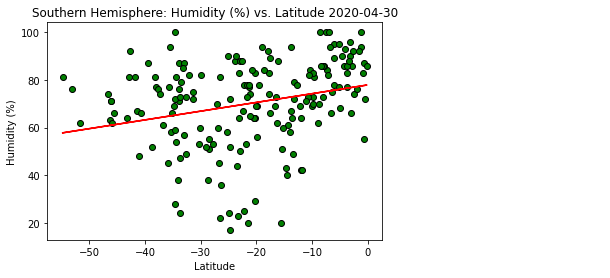

In [30]:
# Creating a plot for max temp vs latitude
x_values = south_hem['Latitude'].astype(float)
y_values = south_hem['Humidity'].astype(float)

# Performing linear regression on max temp vs. latitude values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Creating scatter plot
plt.scatter(x_values,y_values, c="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"Southern Hemisphere: Humidity (%) vs. Latitude {date_stamp}")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
     
plt.savefig("./output/Images/SH_Humidity_vs_Latitude.png")
 
# Print r square value
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.010175969777479298


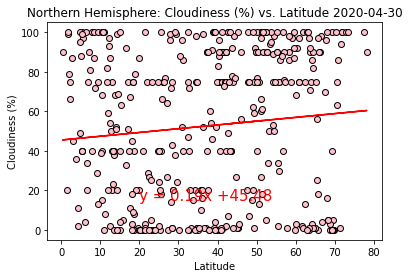

In [34]:
# Creating a plot for max temp vs latitude
x_values = north_hem['Latitude'].astype(float)
y_values = north_hem['Cloudiness %'].astype(float)

# Performing linear regression on max temp vs. latitude values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Creating scatter plot
plt.scatter(x_values,y_values, c="pink", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"Northern Hemisphere: Cloudiness (%) vs. Latitude {date_stamp}")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
     
plt.savefig("./output/Images/NH_Cloudiness_vs_Latitude.png")
 
# Print r square value
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.004260049835834149


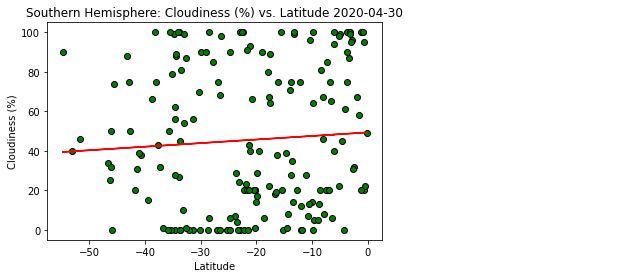

In [35]:
# Creating a plot for max temp vs latitude
x_values = south_hem['Latitude'].astype(float)
y_values = south_hem['Cloudiness %'].astype(float)

# Performing linear regression on max temp vs. latitude values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Creating scatter plot
plt.scatter(x_values,y_values, c="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"Southern Hemisphere: Cloudiness (%) vs. Latitude {date_stamp}")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
     
plt.savefig("./output/Images/SH_Cloudiness_vs_Latitude.png")
 
# Print r square value
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.013225594122139266


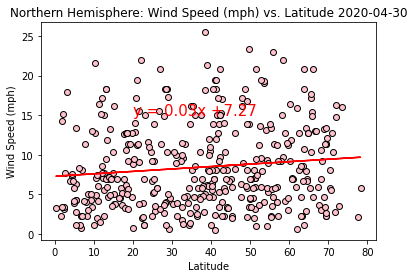

In [36]:
# Creating a plot for max temp vs latitude
x_values = north_hem['Latitude'].astype(float)
y_values = north_hem['Wind Speed (mph)'].astype(float)

# Performing linear regression on max temp vs. latitude values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Creating scatter plot
plt.scatter(x_values,y_values, c="pink", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"Northern Hemisphere: Wind Speed (mph) vs. Latitude {date_stamp}")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
     
plt.savefig("./output/Images/NH_Speed_vs_Latitude.png")
 
# Print r square value
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.028538049973507142


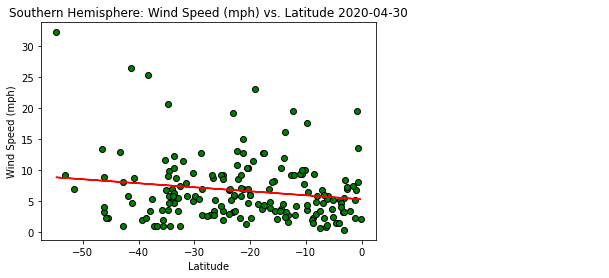

In [37]:
# Creating a plot for max temp vs latitude
x_values = south_hem['Latitude'].astype(float)
y_values = south_hem['Wind Speed (mph)'].astype(float)

# Performing linear regression on max temp vs. latitude values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Creating scatter plot
plt.scatter(x_values,y_values, c="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"Southern Hemisphere: Wind Speed (mph) vs. Latitude {date_stamp}")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
     
plt.savefig("./output/Images/SH_Speed_vs_Latitude.png")
 
# Print r square value
print(f"The r-squared is: {rvalue**2}")
plt.show()